In [1]:
import polychrom
import warnings
import numpy as np
from polychrom.hdf5_format import HDF5Reporter, list_URIs, load_URI, load_hdf5_file
import matplotlib.pyplot as plt
import h5py 

This notebook is for simple visualization of polymer simulation, with making animations using matplotlib functions.

Simulation folder

In [4]:
path_dict = {}

directory='/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_b/simulations/'


sample='LIFETIME_50_SEPARATION_100_RSTALL_0.9_LSTALL_0.0_RC_0.0_LC_0.9_stalldist_1_STEPS_200_velocitymultiplier_1_Tad_1000'

folder_name=directory+sample


MovieWriter imagemagick unavailable; using Pillow instead.


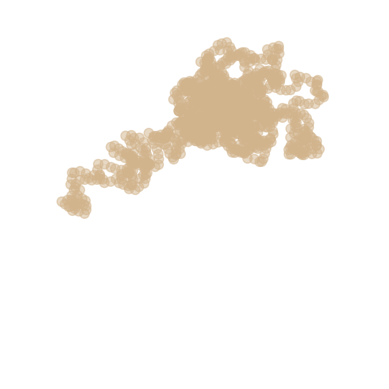

In [5]:
import matplotlib.animation
from matplotlib.animation import FuncAnimation
URIs= polychrom.hdf5_format.list_URIs(folder_name)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
xyz_ref=polychrom.hdf5_format.load_URI(URIs[0])['pos']
monomer_number=1000 #number of monomer to visualize
frame_number=100 #number of frames
delta=5 #coordinate spacing edge 
x_ref,y_ref,z_ref=xyz_ref[:monomer_number,0],xyz_ref[:monomer_number,1],xyz_ref[:monomer_number,2]
xmax, ymax, zmax=np.max(x_ref),np.max(y_ref),np.max(z_ref)
xmin, ymin, zmin=np.min(x_ref),np.min(y_ref),np.min(z_ref)
def animate(i):
    xyz=polychrom.hdf5_format.load_URI(URIs[i])['pos']
    x=xyz[:monomer_number,0]
    y=xyz[:monomer_number,1]
    z=xyz[:monomer_number,2]
    ax.clear()
    ax.set_xlim(xmin-delta,xmax+delta)
    ax.set_ylim(ymin-delta,ymax+delta)
    ax.set_zlim(zmin-delta,zmax+delta)
    ax.scatter(x,y,z,s=45,alpha=0.5,color='tan') 
    ax.plot(x,y,z,linewidth=0.15,color='tan')
    ax.grid(linewidth=0.05,color='white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_axis_off()

ani = FuncAnimation(fig, animate,frames=frame_number,repeat=False)
ani.save('polymer.gif', writer='imagemagick')
plt.rcParams['grid.color'] = "white" # change color
plt.show()